# penguins

In [1]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = sns.load_dataset('penguins')

In [3]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [4]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [5]:
df.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,MALE


In [6]:
print(df.shape)

(344, 7)


In [7]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
species              344 non-null object
island               344 non-null object
bill_length_mm       342 non-null float64
bill_depth_mm        342 non-null float64
flipper_length_mm    342 non-null float64
body_mass_g          342 non-null float64
sex                  333 non-null object
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [9]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

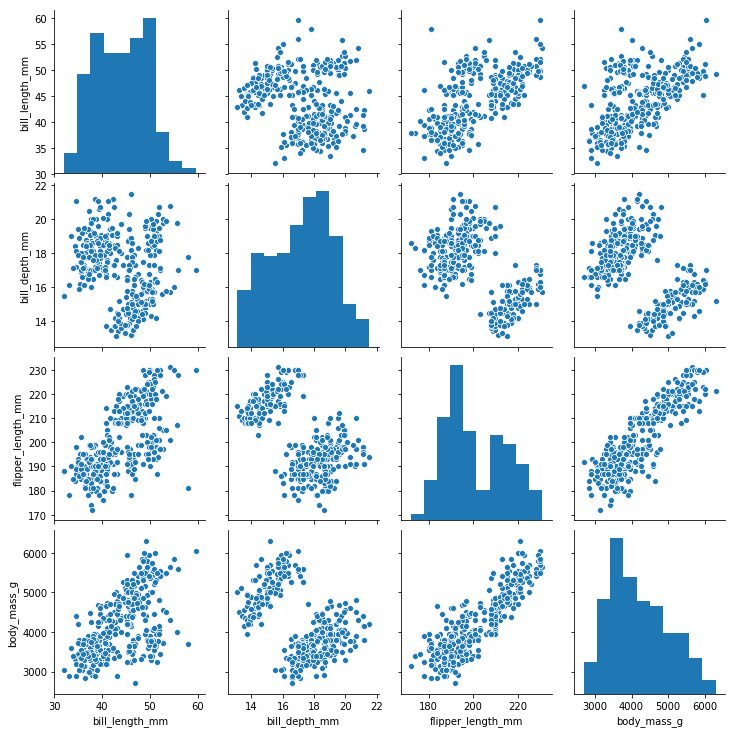

In [12]:
sns.pairplot(df)

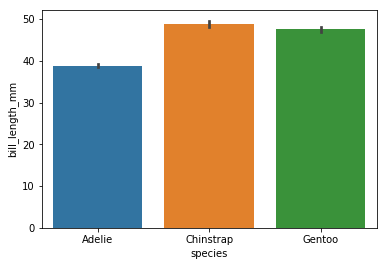

In [13]:
sns.barplot(x='species', y='bill_length_mm', data=df)

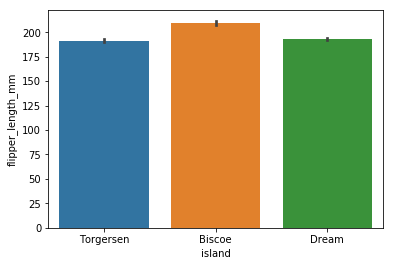

In [14]:
sns.barplot(x='island', y='flipper_length_mm', data=df)

In [15]:
groupedvalues = df.groupby('species').mean().reset_index()
groupedvalues.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,38.823973,18.347260,190.102740,3706.164384
1,Chinstrap,48.833824,18.420588,195.823529,3733.088235
2,Gentoo,47.568067,14.996639,217.235294,5092.436975


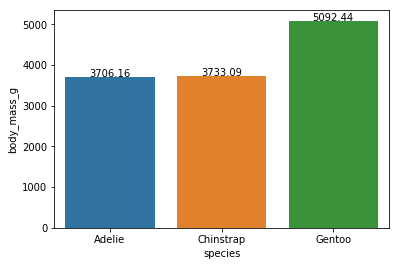

In [16]:
g =sns.barplot(x='species',y='body_mass_g',data=groupedvalues)

for index, row in groupedvalues.iterrows():
    g.text(row.name, row.body_mass_g, round(row.body_mass_g, 2), color='black', ha="center")

In [17]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
species              333 non-null object
island               333 non-null object
bill_length_mm       333 non-null float64
bill_depth_mm        333 non-null float64
flipper_length_mm    333 non-null float64
body_mass_g          333 non-null float64
sex                  333 non-null object
dtypes: float64(4), object(3)
memory usage: 30.8+ KB


In [19]:
print(df.species.unique())
print(df.island.unique())
print(df.sex.unique())

['Adelie' 'Chinstrap' 'Gentoo']
['Torgersen' 'Biscoe' 'Dream']
['MALE' 'FEMALE']


In [20]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

dfi = df.copy()

dfi['species'] = label_encoder.fit_transform(dfi['species'])
print(label_encoder.classes_)
dfi['island'] = label_encoder.fit_transform(dfi['island'])
print(label_encoder.classes_)
dfi['sex'] = label_encoder.fit_transform(dfi['sex'])
print(label_encoder.classes_)

['Adelie' 'Chinstrap' 'Gentoo']
['Biscoe' 'Dream' 'Torgersen']
['FEMALE' 'MALE']


In [21]:
dfi.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
4,0,2,36.7,19.3,193.0,3450.0,0
5,0,2,39.3,20.6,190.0,3650.0,1


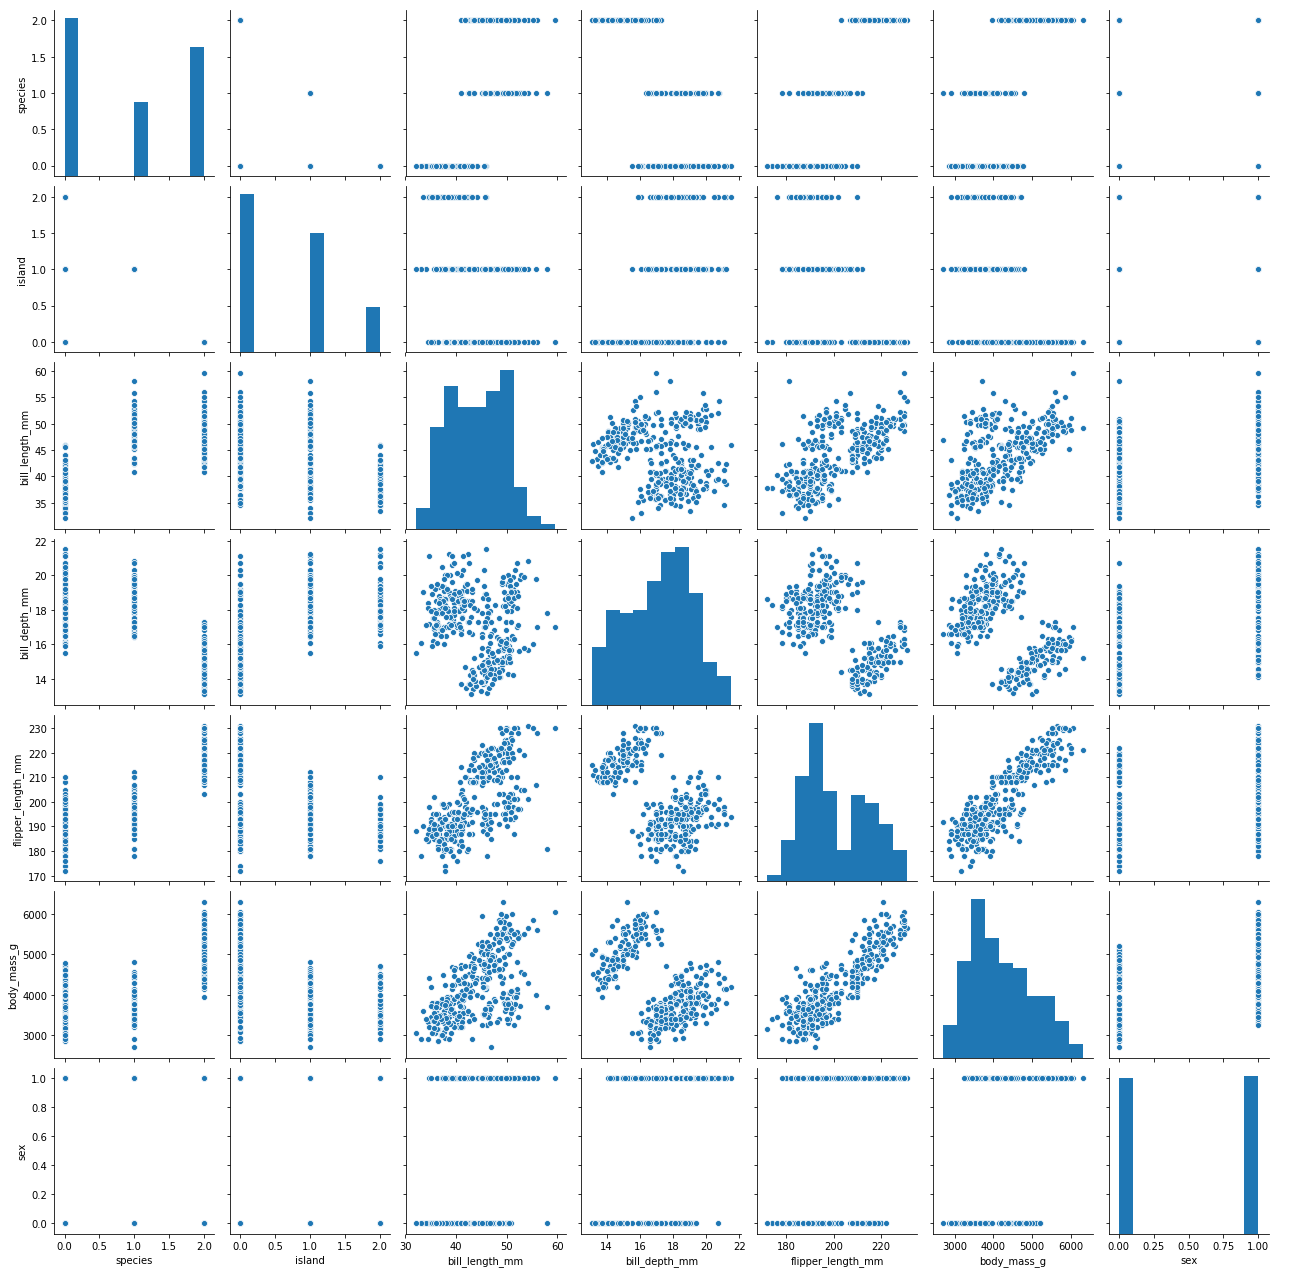

In [22]:
sns.pairplot(dfi)

In [23]:
y_train = dfi[['species']].values
dfi.drop('species', axis=1, inplace=True)
X_train = dfi.values

In [24]:
print(X_train[:5])

[[2.00e+00 3.91e+01 1.87e+01 1.81e+02 3.75e+03 1.00e+00]
 [2.00e+00 3.95e+01 1.74e+01 1.86e+02 3.80e+03 0.00e+00]
 [2.00e+00 4.03e+01 1.80e+01 1.95e+02 3.25e+03 0.00e+00]
 [2.00e+00 3.67e+01 1.93e+01 1.93e+02 3.45e+03 0.00e+00]
 [2.00e+00 3.93e+01 2.06e+01 1.90e+02 3.65e+03 1.00e+00]]


In [25]:
print(y_train[:5])

[[0]
 [0]
 [0]
 [0]
 [0]]


In [26]:
from sklearn import tree

In [27]:
model = tree.DecisionTreeClassifier()

In [28]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [29]:
y = model.predict(X_train)

In [30]:
print(y.shape)
print(y_train.shape)

(333,)
(333, 1)


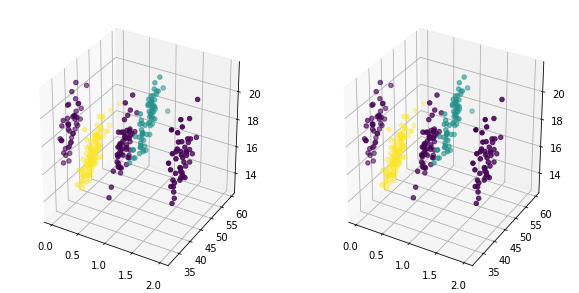

In [31]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D 

fig, axs = plt.subplots(ncols=2, figsize=(10, 5), subplot_kw={"projection":"3d"})
for ax, data in zip(axs, [y, y_train.reshape(-1)]):
    ax.scatter(X_train[:,0], X_train[:,1],X_train[:,2], c=data)
plt.show()

In [32]:
print(model.score(X_train, y_train))

1.0
